# Считывание графа и запись его в csv формат

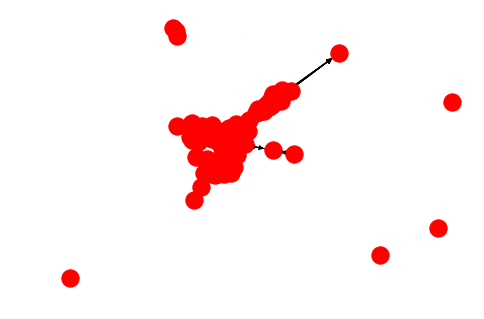

In [8]:
# Считывание графа
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas
G=nx.read_gexf('friends.gexf')
nx.draw(G) 
plt.draw()  

# Получение матрицы смежности и списков смежности ориентированного и неориентированного графов
G_matrix = nx.to_numpy_matrix(G)
G_undir_matrix = nx.to_numpy_matrix(G.to_undirected())
G_list = nx.to_dict_of_lists(G)
G_undir_list = nx.to_dict_of_lists(G.to_undirected())
G_pd = nx.to_pandas_adjacency(G)

# Запись матрицы смежности в csv формат 
import pandas as pd 
G_pd.to_csv('matrix.csv')

# Запись списка смежности в csv формат 
new_list = []
for i, ls in G_list.items():
    ls.insert(0, i)
    new_list.append(ls)
import csv
with open('list.csv', 'w') as f:
    writer = csv.writer(f)
    for i in new_list:
        writer.writerow(i)

# Первый пункт

In [3]:
# Поиск в глубину(через список смежности)
def dfs(v, matrix):
    if v not in stack:
        stack.append(v)
    for i in matrix[(v)]:
        if i not in comp and i not in stack:
            dfs(i, matrix)
            return
    comp.append(stack.pop())
    if stack != []:
        dfs(stack[-1], matrix)

In [5]:
# Подсчет количества компонент слабой связности и количества вершин в них с помощью поиска в глубину
my_list = []
count = 0
st = []
while (set(st) != set(G_undir_list.keys())):
    stack = []
    comp = []
    dfs(list(set(G_undir_list.keys()).difference(set(st)))[0], G_undir_list)
    if count == 0:
        my_list += comp
    st += comp
    print('Вершин в {} компоненте'.format(count+1), len(comp))
    count += 1
print('Количество слабых компонент связности:', count)
print(len(st))

Вершин в 1 компоненте 173
Вершин в 2 компоненте 3
Вершин в 3 компоненте 1
Вершин в 4 компоненте 1
Вершин в 5 компоненте 1
Вершин в 6 компоненте 1
Количество слабых компонент связности: 6
180


In [6]:
# Подсчет количества компонент сильной связности и количества вершин в них с помощью поиска в глубину
count = 0
G_reversed = nx.reverse_view(G)
G_list_reversed = nx.to_dict_of_lists(G_reversed)
st = []
while (set(st) != set(G_list_reversed.keys())):
    stack = []
    comp = []
    dfs(list(set(G_list_reversed.keys()).difference(set(st)))[0], G_list_reversed)
    print(list(set(G_list_reversed.keys()).difference(set(st)))[0])
    st += comp
    count+=1
print(count)


32879395
380297657
139609891
157640734
433214644
95632336
250451978
7


In [7]:
st = []
while (set(st) != set(matrix.keys())):
    stack = []
    comp = []
    dfs(list(set(matrix.keys()).difference(set(st)))[0])
    st += comp
    print(len(comp))


NameError: name 'matrix' is not defined

In [8]:
x = nx.number_strongly_connected_components(G)
x

7

In [9]:
y = nx.number_weakly_connected_components(G)
y

6

In [10]:
for i in nx.strongly_connected_components(G):
    print(len(i))

1
172
1
3
1
1
1


In [11]:
for i in nx.weakly_connected_components(G):
    print(len(i))

173
1
3
1
1
1


In [12]:
173/180

0.9611111111111111

# Второй пункт

In [56]:
# Получение наибольшей компоненты связности для дальнейшего рассмотрения(в my_list при поиске в глубину мы сохранили 
# все индексы, состоящие в наибольшей компоненте связности)
G_main_comp_list = {}
G_main_comp_list.update(G_undir_list)
bad_fields = set(G_undir_list.keys()).difference(set(my_list))
for i in bad_fields:
    if i in G_main_comp_list.keys():
        G_main_comp_list.pop(i)

for i in G_main_comp_list.values():
    for j in bad_fields:
        if j in i:
            i.remove(j)
            
G_main_comp = nx.from_dict_of_lists(G_main_comp_list)
G_main_comp_matrix = nx.to_numpy_matrix(G_main_comp)
indexes = list(nx.to_pandas_adjacency(G_main_comp))

In [14]:
# Функция, реализующая алгоритм Флойда-Воршалла для нахождения кратчайших расстояний между вершинами
from math import inf

def floyd_vor(G):
    for i in range(G.shape[0]):
        for j in range(G.shape[0]):
            if G[i, j] == 0:
                G[i, j] = inf
        G[i, i] = 1
    for k in range(G.shape[0]):
        for i in range(G.shape[0]):
            for j in range(G.shape[0]):
                G[i, j] = min(G[i, j], G[i, k] + G[k, j])

In [15]:
G_distance = G_main_comp_matrix.copy()
floyd_vor(G_distance)

In [35]:
print(G_distance)

[[1. 1. 3. ... 4. 3. 3.]
 [1. 1. 2. ... 4. 2. 3.]
 [3. 2. 1. ... 4. 2. 3.]
 ...
 [4. 4. 4. ... 1. 5. 3.]
 [3. 2. 2. ... 5. 1. 3.]
 [3. 3. 3. ... 3. 3. 1.]]


In [25]:
diametr = np.max(G_distance[:])
print(diametr)

6.0


In [26]:
radius = min([np.max(i) for i in G_distance])
print(radius)

3.0


In [57]:
periphery = [i for i in range(G_distance.shape[0]) if np.max(G_distance[i]) == diametr]
print(periphery)
for i in periphery:
    print(indexes[i])

[4, 8, 10, 90, 126, 142, 154, 157, 158, 159, 160, 166, 167, 168, 170]
10703524
19656532
23358624
104280591
154857676
208242311
305570022
320148751
323578278
327624557
328766153
380297657
442730793
458868266
463252382


In [58]:
center = [i for i in range(G_distance.shape[0]) if np.max(G_distance[i]) == radius]
print(center)
for i in center:
    print(indexes[i])

[22]
32879395


In [51]:
mean = np.mean(G_distance)
print(mean)

2.5973136422867453


# Третий пункт

In [62]:
def N(id):
    return G_main_comp_list[id]

In [89]:
def mera(Graph, func):
    for i in G_main_comp_list.keys():
        for j in G_main_comp_list.keys():
            Graph[indexes.index(i), indexes.index(j)] = func(i, j)

In [87]:
def common_neighbors(i, j):
    return len(set(N(i)).intersection(set(N(j))))

In [77]:
def jaccard_coefficient(i, j):
    return len(set(N(i)).intersection(set(N(j))))/len(set(N(i)).union(set(N(j))))

In [103]:
def adamic_adar(i, j):
    return len(set(N(i)).intersection(set(N(j))))

In [79]:
def preferential_attachment(i, j):
    return len(N(i))*len(N(j))

In [75]:
#import itertools
#list(itertools.combinations(set(N('55673660')).intersection(set(N('32879395'))), 2)) 

In [100]:
mera1 = np.zeros((173, 173))
mera(mera1, common_neighbors)
print(mera1)

[[ 7.  0.  0. ...  0.  0.  0.]
 [ 0. 18.  9. ...  0.  4.  0.]
 [ 0.  9. 15. ...  0.  2.  0.]
 ...
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  4.  2. ...  0.  4.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]


In [101]:
mera2 = np.zeros((173, 173))
mera(mera2, jaccard_coefficient)
print(mera2)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.375      ... 0.         0.22222222 0.        ]
 [0.         0.375      1.         ... 0.         0.11764706 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.22222222 0.11764706 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [104]:
mera3 = np.zeros((173, 173))
mera(mera3, adamic_adar)
print(mera3)

[[ 7.  0.  0. ...  0.  0.  0.]
 [ 0. 18.  9. ...  0.  4.  0.]
 [ 0.  9. 15. ...  0.  2.  0.]
 ...
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  4.  2. ...  0.  4.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]


In [105]:
mera4 = np.zeros((173, 173))
mera(mera4, preferential_attachment)
print(mera4)

[[ 49. 126. 105. ...  28.  28. 140.]
 [126. 324. 270. ...  72.  72. 360.]
 [105. 270. 225. ...  60.  60. 300.]
 ...
 [ 28.  72.  60. ...  16.  16.  80.]
 [ 28.  72.  60. ...  16.  16.  80.]
 [140. 360. 300. ...  80.  80. 400.]]


# Четвертый пункт

In [106]:
def degree_centrality(id):
    return len(G_main_comp_list[id])/len(G_main_comp_list.keys())

In [111]:
def closeness_centrality(id):
    return (len(G_main_comp_list.keys()) - 1)/(np.sum(G_distance[indexes.index(id)])-
                                               G_distance[indexes.index(id), indexes.index(id)])

In [ ]:
def betweenness_centrality(id)

In [ ]:
vector = np.linalg.eig(G_main_comp_matrix)[1][:,[np.linalg.eig(G_main_comp_matrix)[0].argmax(axis=0)]]
def eigenvector_centrality(id):
    return vector[indexes.index(id)]

In [134]:
np.linalg.eig(G_main_comp_matrix)[0]

array([ 2.48884939e+01,  2.17074900e+01,  1.60482612e+01,  1.04280764e+01,
        8.88620021e+00,  8.29976812e+00,  7.41028460e+00,  6.48139573e+00,
        5.97259994e+00, -6.81778832e+00,  5.28413507e+00,  5.02626484e+00,
       -6.39179458e+00, -6.24018483e+00,  4.75939855e+00, -5.86137519e+00,
       -5.55928706e+00, -5.47340274e+00, -5.19978202e+00, -5.27614688e+00,
        4.45399267e+00,  4.04945920e+00,  3.89475087e+00,  3.78364385e+00,
        3.70869249e+00,  3.50513904e+00, -4.95752871e+00, -4.88804658e+00,
       -4.79914109e+00, -4.63803109e+00, -4.53807802e+00, -4.43675002e+00,
       -4.35365193e+00, -4.21979395e+00, -4.02682843e+00,  3.27519541e+00,
        3.23940270e+00,  3.11896047e+00,  2.94952993e+00, -3.85460233e+00,
       -3.76721063e+00, -3.70275730e+00, -3.58158485e+00, -3.53712722e+00,
       -3.51499600e+00,  2.83277762e+00,  2.79479252e+00,  2.63036641e+00,
        2.52450415e+00, -3.33541130e+00, -3.30809525e+00, -3.20511538e+00,
       -3.10097230e+00, -

In [30]:
G2 = G2.to_undirected()
G2_matrix = nx.to_numpy_matrix(G2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


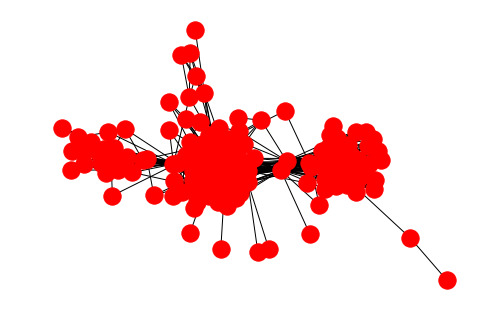

In [61]:
nx.draw(G2)
plt.draw()

In [62]:
G2_matrix.shape[0]

173

In [63]:
G2_matrix

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
import numpy as np

In [65]:
x = np.array([])
for i in G2_matrix:
    x = np.append(x, np.sum(i))

In [66]:
x

array([ 7., 18., 15., 14.,  1., 16., 11.,  6.,  6.,  9.,  8., 38., 11.,
       16., 26., 16., 23., 23.,  6., 13., 18., 21., 56., 10., 10., 24.,
       19., 12., 17., 22., 16., 14., 15.,  5., 33., 11., 16., 16., 14.,
       54., 21., 15., 15., 16., 29.,  8., 38., 48.,  4., 19., 30.,  8.,
       31.,  5., 35., 35., 32.,  6.,  2., 18.,  9., 17., 22., 22., 10.,
        6., 13., 16., 18., 26., 10., 28.,  3., 19.,  3., 18., 47., 18.,
        3., 16., 38., 49.,  1., 15., 18., 24., 24.,  6.,  3., 37.,  4.,
       16., 20.,  8., 24., 25., 31., 19., 19.,  9.,  3., 29., 15., 15.,
       14., 19., 24.,  8., 12.,  2., 42., 20., 22., 11., 23., 19., 20.,
       12., 27., 12., 10.,  2., 16., 13., 34., 10.,  6., 34.,  9., 13.,
       18., 25.,  9.,  4., 20.,  2., 10.,  6.,  1., 11., 26., 17.,  5.,
       16.,  7.,  8., 12., 25.,  7., 57., 23.,  1., 11.,  4., 16.,  5.,
       31.,  4.,  3.,  1.,  4., 27., 13.,  8.,  6., 33.,  9.,  8.,  2.,
        2.,  4.,  4., 20.])

In [67]:
np.mean(x)

16.393063583815028

In [68]:
radius = nx.radius(G2)
diametr = nx.diameter(G2)

In [69]:
radius

3

In [70]:
diametr

6

In [71]:
center = nx.center(G2)

In [72]:
center

['32879395']

In [73]:
periphery = nx.periphery(G2)

In [74]:
periphery

['10703524',
 '19656532',
 '23358624',
 '104280591',
 '154857676',
 '208242311',
 '305570022',
 '320148751',
 '323578278',
 '327624557',
 '328766153',
 '380297657',
 '442730793',
 '458868266',
 '463252382']

In [100]:
mera2 = nx.jaccard_coefficient(G2)

In [101]:
mass = []
for i in mera2:
    mass.

('83460003', '104280591', 0.0)
o
('83460003', '142945302', 0.0)
o
('83460003', '25037036', 0.05555555555555555)
o
('83460003', '140420515', 0.0)
o
('83460003', '314382579', 0.030303030303030304)
o
('83460003', '12036831', 0.05555555555555555)
o
('83460003', '192158621', 0.0)
o
('83460003', '95350384', 0.0)
o
('83460003', '137784015', 0.0)
o
('83460003', '202081175', 0.03571428571428571)
o
('83460003', '216953513', 0.0)
o
('83460003', '59477024', 0.0)
o
('83460003', '10581773', 0.0625)
o
('83460003', '148322256', 0.0)
o
('83460003', '44250743', 0.0)
o
('83460003', '277263421', 0.07692307692307693)
o
('83460003', '462320146', 0.0)
o
('83460003', '44311302', 0.0)
o
('83460003', '10703524', 0.0)
o
('83460003', '86481833', 0.10526315789473684)
o
('83460003', '190625739', 0.0)
o
('83460003', '442730793', 0.0)
o
('83460003', '72203174', 0.08333333333333333)
o
('83460003', '84948706', 0.10526315789473684)
o
('83460003', '82892660', 0.0)
o
('83460003', '55673660', 0.0625)
o
('83460003', '316474

('140420515', '112836719', 0.0)
o
('140420515', '97705372', 0.2702702702702703)
o
('140420515', '135596617', 0.0)
o
('140420515', '26493446', 0.0)
o
('140420515', '90212044', 0.03389830508474576)
o
('140420515', '98770978', 0.0)
o
('140420515', '78753932', 0.0)
o
('140420515', '134171330', 0.0)
o
('140420515', '276103002', 0.0)
o
('140420515', '55632341', 0.0)
o
('140420515', '307787690', 0.0)
o
('140420515', '26972255', 0.022222222222222223)
o
('140420515', '94365754', 0.014084507042253521)
o
('140420515', '40638372', 0.0)
o
('140420515', '57773274', 0.0)
o
('140420515', '24183424', 0.0)
o
('140420515', '45823358', 0.0)
o
('140420515', '69900093', 0.0)
o
('140420515', '161381423', 0.02857142857142857)
o
('140420515', '23358624', 0.0)
o
('140420515', '97001392', 0.0)
o
('140420515', '114115641', 0.0)
o
('140420515', '290296382', 0.0)
o
('140420515', '148154766', 0.0)
o
('140420515', '169344131', 0.0)
o
('140420515', '52047399', 0.0)
o
('140420515', '76774743', 0.0)
o
('140420515', '633

('192158621', '112836719', 0.11764705882352941)
o
('192158621', '97705372', 0.029411764705882353)
o
('192158621', '135596617', 0.15)
o
('192158621', '26493446', 0.0)
o
('192158621', '98770978', 0.13333333333333333)
o
('192158621', '78753932', 0.11538461538461539)
o
('192158621', '134171330', 0.25)
o
('192158621', '276103002', 0.0)
o
('192158621', '122450311', 0.05263157894736842)
o
('192158621', '76810177', 0.0)
o
('192158621', '307787690', 0.0)
o
('192158621', '40638372', 0.17857142857142858)
o
('192158621', '57773274', 0.0)
o
('192158621', '24183424', 0.2222222222222222)
o
('192158621', '45823358', 0.08695652173913043)
o
('192158621', '69900093', 0.0)
o
('192158621', '161381423', 0.14285714285714285)
o
('192158621', '23358624', 0.0)
o
('192158621', '177123098', 0.03333333333333333)
o
('192158621', '97001392', 0.0)
o
('192158621', '114115641', 0.12903225806451613)
o
('192158621', '290296382', 0.07142857142857142)
o
('192158621', '148154766', 0.05)
o
('192158621', '68546752', 0.0)
o
('

o
('216953513', '45005078', 0.0)
o
('216953513', '305570022', 0.0)
o
('216953513', '80659889', 0.3103448275862069)
o
('216953513', '109601125', 0.0)
o
('216953513', '177756789', 0.0)
o
('216953513', '66458783', 0.0)
o
('216953513', '161589752', 0.0)
o
('216953513', '261796884', 0.029411764705882353)
o
('216953513', '120706043', 0.0)
o
('216953513', '151546590', 0.08695652173913043)
o
('216953513', '62561551', 0.0)
o
('216953513', '54253201', 0.0)
o
('216953513', '86522114', 0.15384615384615385)
o
('216953513', '142682796', 0.0)
o
('216953513', '12730089', 0.0)
o
('216953513', '186438227', 0.0)
o
('216953513', '336365255', 0.0)
o
('216953513', '135371914', 0.17647058823529413)
o
('216953513', '138667209', 0.030303030303030304)
o
('59477024', '10581773', 0.0)
o
('59477024', '277263421', 0.0)
o
('59477024', '148322256', 0.0)
o
('59477024', '44250743', 0.0)
o
('59477024', '462320146', 0.0)
o
('59477024', '10703524', 0.0)
o
('59477024', '86481833', 0.0)
o
('59477024', '190625739', 0.0)
o
('

('44250743', '64669608', 0.0)
o
('44250743', '32536801', 0.0)
o
('44250743', '44269012', 0.0)
o
('44250743', '36175307', 0.0)
o
('44250743', '208584850', 0.0)
o
('44250743', '169726450', 0.05555555555555555)
o
('44250743', '380297657', 0.5)
o
('44250743', '10454944', 0.0)
o
('44250743', '136421518', 0.0)
o
('44250743', '258430705', 0.014084507042253521)
o
('44250743', '233503288', 0.0)
o
('44250743', '151533735', 0.0)
o
('44250743', '10015045', 0.0)
o
('44250743', '81781101', 0.0)
o
('44250743', '126608863', 0.0)
o
('44250743', '328766153', 0.0)
o
('44250743', '458868266', 0.13333333333333333)
o
('44250743', '22453860', 0.0)
o
('44250743', '87377380', 0.0)
o
('44250743', '210490430', 0.047619047619047616)
o
('44250743', '373044930', 0.0)
o
('44250743', '27101859', 0.0)
o
('44250743', '84800843', 0.0)
o
('44250743', '323578278', 0.0)
o
('44250743', '26967860', 0.02702702702702703)
o
('44250743', '39691986', 0.0)
o
('44250743', '206506528', 0.03225806451612903)
o
('44250743', '54696417',

('44311302', '182093565', 0.22857142857142856)
o
('44311302', '99346246', 0.0)
o
('44311302', '32888810', 0.04878048780487805)
o
('44311302', '76411897', 0.11428571428571428)
o
('44311302', '34939496', 0.017857142857142856)
o
('44311302', '526224154', 0.08823529411764706)
o
('44311302', '65002107', 0.015625)
o
('44311302', '133340034', 0.2631578947368421)
o
('44311302', '19656532', 0.0)
o
('44311302', '162865468', 0.0)
o
('44311302', '50390508', 0.2857142857142857)
o
('44311302', '6043644', 0.17647058823529413)
o
('44311302', '19636146', 0.14705882352941177)
o
('44311302', '45005078', 0.0)
o
('44311302', '305570022', 0.0)
o
('44311302', '109601125', 0.0)
o
('44311302', '177756789', 0.029411764705882353)
o
('44311302', '66458783', 0.0)
o
('44311302', '161589752', 0.0)
o
('44311302', '261796884', 0.037037037037037035)
o
('44311302', '120706043', 0.0196078431372549)
o
('44311302', '62561551', 0.0)
o
('44311302', '54253201', 0.01639344262295082)
o
('44311302', '86522114', 0.090909090909090

('442730793', '55632341', 0.0)
o
('442730793', '307787690', 0.0)
o
('442730793', '26972255', 0.0)
o
('442730793', '94365754', 0.0)
o
('442730793', '40638372', 0.0)
o
('442730793', '57773274', 0.09090909090909091)
o
('442730793', '24183424', 0.0)
o
('442730793', '45823358', 0.0)
o
('442730793', '161381423', 0.0)
o
('442730793', '23358624', 0.45454545454545453)
o
('442730793', '177123098', 0.0)
o
('442730793', '114115641', 0.0)
o
('442730793', '290296382', 0.0)
o
('442730793', '148154766', 0.0)
o
('442730793', '68546752', 0.0)
o
('442730793', '169344131', 0.0)
o
('442730793', '52047399', 0.0)
o
('442730793', '76774743', 0.4)
o
('442730793', '63319474', 0.0)
o
('442730793', '94754022', 0.0)
o
('442730793', '45246395', 0.0)
o
('442730793', '41479823', 0.0)
o
('442730793', '157426254', 0.0)
o
('442730793', '63948244', 0.0)
o
('442730793', '68783210', 0.0)
o
('442730793', '143755571', 0.0)
o
('442730793', '41580023', 0.375)
o
('442730793', '218209182', 0.0)
o
('442730793', '108419256', 0.0)


o
('31647437', '86522114', 0.0)
o
('31647437', '142682796', 0.02702702702702703)
o
('31647437', '186438227', 0.043478260869565216)
o
('31647437', '135371914', 0.0)
o
('31647437', '138667209', 0.02564102564102564)
o
('215150187', '134353024', 0.038461538461538464)
o
('215150187', '362931361', 0.0)
o
('215150187', '33370884', 0.058823529411764705)
o
('215150187', '64669608', 0.19444444444444445)
o
('215150187', '32536801', 0.11538461538461539)
o
('215150187', '44269012', 0.0)
o
('215150187', '208584850', 0.043478260869565216)
o
('215150187', '169726450', 0.0)
o
('215150187', '380297657', 0.0)
o
('215150187', '10454944', 0.21052631578947367)
o
('215150187', '136421518', 0.0)
o
('215150187', '258430705', 0.015625)
o
('215150187', '233503288', 0.0)
o
('215150187', '151533735', 0.0)
o
('215150187', '81781101', 0.0)
o
('215150187', '126608863', 0.0)
o
('215150187', '328766153', 0.0)
o
('215150187', '458868266', 0.0)
o
('215150187', '22453860', 0.0)
o
('215150187', '87377380', 0.0)
o
('2151501

o
('64669608', '323578278', 0.0)
o
('64669608', '26967860', 0.0)
o
('64669608', '39691986', 0.0)
o
('64669608', '53260067', 0.0)
o
('64669608', '49109186', 0.011363636363636364)
o
('64669608', '206506528', 0.0196078431372549)
o
('64669608', '358967649', 0.13157894736842105)
o
('64669608', '45745264', 0.0)
o
('64669608', '68698489', 0.0)
o
('64669608', '27053186', 0.1388888888888889)
o
('64669608', '100165070', 0.014084507042253521)
o
('64669608', '58840899', 0.08)
o
('64669608', '154857676', 0.0)
o
('64669608', '320148751', 0.0)
o
('64669608', '139333249', 0.0)
o
('64669608', '23968042', 0.04285714285714286)
o
('64669608', '327624557', 0.0)
o
('64669608', '66585034', 0.0)
o
('64669608', '526462558', 0.018518518518518517)
o
('64669608', '38038701', 0.0)
o
('64669608', '112836719', 0.0)
o
('64669608', '135596617', 0.0)
o
('64669608', '26493446', 0.0)
o
('64669608', '90212044', 0.04285714285714286)
o
('64669608', '98770978', 0.0)
o
('64669608', '78753932', 0.019230769230769232)
o
('646696

('380297657', '49109186', 0.14545454545454545)
o
('380297657', '206506528', 0.0)
o
('380297657', '54696417', 0.0)
o
('380297657', '358967649', 0.0)
o
('380297657', '45745264', 0.0)
o
('380297657', '68698489', 0.0)
o
('380297657', '27053186', 0.0)
o
('380297657', '100165070', 0.0)
o
('380297657', '58840899', 0.0)
o
('380297657', '154857676', 0.36363636363636365)
o
('380297657', '320148751', 0.0)
o
('380297657', '139333249', 0.0)
o
('380297657', '23968042', 0.0)
o
('380297657', '327624557', 0.0)
o
('380297657', '157062074', 0.0)
o
('380297657', '66585034', 0.1)
o
('380297657', '526462558', 0.0)
o
('380297657', '38038701', 0.0)
o
('380297657', '85219118', 0.0)
o
('380297657', '135286430', 0.0)
o
('380297657', '112836719', 0.0)
o
('380297657', '97705372', 0.0)
o
('380297657', '135596617', 0.0)
o
('380297657', '26493446', 0.5625)
o
('380297657', '90212044', 0.0)
o
('380297657', '98770978', 0.0)
o
('380297657', '78753932', 0.0)
o
('380297657', '134171330', 0.0)
o
('380297657', '276103002', 0

('233503288', '290296382', 0.1)
o
('233503288', '148154766', 0.13333333333333333)
o
('233503288', '68546752', 0.041666666666666664)
o
('233503288', '169344131', 0.06666666666666667)
o
('233503288', '52047399', 0.1)
o
('233503288', '76774743', 0.0)
o
('233503288', '63319474', 0.05555555555555555)
o
('233503288', '94754022', 0.0)
o
('233503288', '26489804', 0.0)
o
('233503288', '45246395', 0.15)
o
('233503288', '41479823', 0.045454545454545456)
o
('233503288', '157426254', 0.23076923076923078)
o
('233503288', '63948244', 0.09090909090909091)
o
('233503288', '68783210', 0.0)
o
('233503288', '143755571', 0.030303030303030304)
o
('233503288', '41580023', 0.10526315789473684)
o
('233503288', '218209182', 0.10344827586206896)
o
('233503288', '144756288', 0.11764705882352941)
o
('233503288', '152129872', 0.1388888888888889)
o
('233503288', '153366864', 0.0625)
o
('233503288', '32879395', 0.06779661016949153)
o
('233503288', '119301334', 0.0)
o
('233503288', '136930646', 0.06521739130434782)
o


o
('22453860', '19636146', 0.0)
o
('22453860', '45745264', 0.041666666666666664)
o
('22453860', '45005078', 0.0)
o
('22453860', '68698489', 0.058823529411764705)
o
('22453860', '27053186', 0.0)
o
('22453860', '58840899', 0.037037037037037035)
o
('22453860', '305570022', 0.041666666666666664)
o
('22453860', '80659889', 0.0)
o
('22453860', '154857676', 0.0)
o
('22453860', '109601125', 0.0)
o
('22453860', '320148751', 0.0)
o
('22453860', '177756789', 0.0)
o
('22453860', '66458783', 0.0)
o
('22453860', '139333249', 0.05263157894736842)
o
('22453860', '161589752', 0.038461538461538464)
o
('22453860', '23968042', 0.09302325581395349)
o
('22453860', '327624557', 0.0)
o
('22453860', '157062074', 0.0)
o
('22453860', '261796884', 0.06666666666666667)
o
('22453860', '120706043', 0.07692307692307693)
o
('22453860', '151546590', 0.0)
o
('22453860', '62561551', 0.0625)
o
('22453860', '54253201', 0.15151515151515152)
o
('22453860', '66585034', 0.0)
o
('22453860', '86522114', 0.0)
o
('22453860', '1426

o
('323578278', '50952050', 0.0)
o
('323578278', '182093565', 0.0)
o
('323578278', '99346246', 0.0)
o
('323578278', '32888810', 0.0)
o
('323578278', '76411897', 0.0)
o
('323578278', '34939496', 0.0)
o
('323578278', '118823531', 0.0)
o
('323578278', '140962408', 0.0)
o
('323578278', '526224154', 0.0)
o
('323578278', '26967860', 0.0)
o
('323578278', '39691986', 0.0)
o
('323578278', '53260067', 0.0)
o
('323578278', '49109186', 0.0)
o
('323578278', '206506528', 0.0)
o
('323578278', '64231904', 0.0)
o
('323578278', '65002107', 0.029411764705882353)
o
('323578278', '133340034', 0.0)
o
('323578278', '19656532', 0.0)
o
('323578278', '162865468', 0.0)
o
('323578278', '132077835', 0.0)
o
('323578278', '54696417', 0.0)
o
('323578278', '50390508', 0.0)
o
('323578278', '6043644', 0.0)
o
('323578278', '358967649', 0.0)
o
('323578278', '19636146', 0.0)
o
('323578278', '45745264', 0.0)
o
('323578278', '45005078', 0.0)
o
('323578278', '68698489', 0.0)
o
('323578278', '27053186', 0.0)
o
('323578278', '1

('45745264', '307787690', 0.0)
o
('45745264', '26972255', 0.4444444444444444)
o
('45745264', '40638372', 0.3103448275862069)
o
('45745264', '57773274', 0.05263157894736842)
o
('45745264', '24183424', 0.17391304347826086)
o
('45745264', '45823358', 0.2)
o
('45745264', '69900093', 0.02702702702702703)
o
('45745264', '161381423', 0.16)
o
('45745264', '23358624', 0.0)
o
('45745264', '177123098', 0.0)
o
('45745264', '97001392', 0.02564102564102564)
o
('45745264', '114115641', 0.21212121212121213)
o
('45745264', '290296382', 0.05263157894736842)
o
('45745264', '148154766', 0.08333333333333333)
o
('45745264', '68546752', 0.0)
o
('45745264', '169344131', 0.0)
o
('45745264', '52047399', 0.19230769230769232)
o
('45745264', '76774743', 0.03571428571428571)
o
('45745264', '94754022', 0.0)
o
('45745264', '26489804', 0.024390243902439025)
o
('45745264', '45246395', 0.28)
o
('45745264', '157426254', 0.041666666666666664)
o
('45745264', '63948244', 0.0)
o
('45745264', '68783210', 0.0)
o
('45745264', '

('139333249', '83619123', 0.07142857142857142)
o
('139333249', '70066774', 0.0)
o
('139333249', '151533735', 0.22727272727272727)
o
('139333249', '351680808', 0.0)
o
('139333249', '127100803', 0.0)
o
('139333249', '114262343', 0.0)
o
('139333249', '135596617', 0.09523809523809523)
o
('139333249', '95344046', 0.08333333333333333)
o
('139333249', '50952050', 0.0)
o
('139333249', '182093565', 0.0)
o
('139333249', '99346246', 0.07692307692307693)
o
('139333249', '32888810', 0.10526315789473684)
o
('139333249', '76411897', 0.0)
o
('139333249', '34939496', 0.06060606060606061)
o
('139333249', '118823531', 0.0)
o
('139333249', '140962408', 0.0)
o
('139333249', '526224154', 0.0)
o
('139333249', '64231904', 0.0)
o
('139333249', '65002107', 0.16216216216216217)
o
('139333249', '133340034', 0.0)
o
('139333249', '19656532', 0.0)
o
('139333249', '162865468', 0.16129032258064516)
o
('139333249', '132077835', 0.0)
o
('139333249', '50390508', 0.0)
o
('139333249', '6043644', 0.0)
o
('139333249', '19636

('526462558', '34939496', 0.1282051282051282)
o
('526462558', '118823531', 0.02)
o
('526462558', '140962408', 0.0)
o
('526462558', '526224154', 0.0)
o
('526462558', '64231904', 0.0)
o
('526462558', '65002107', 0.18181818181818182)
o
('526462558', '133340034', 0.0)
o
('526462558', '19656532', 0.04)
o
('526462558', '132077835', 0.0)
o
('526462558', '50390508', 0.0)
o
('526462558', '6043644', 0.0)
o
('526462558', '19636146', 0.0)
o
('526462558', '45005078', 0.0)
o
('526462558', '305570022', 0.02857142857142857)
o
('526462558', '80659889', 0.022222222222222223)
o
('526462558', '109601125', 0.0)
o
('526462558', '177756789', 0.0)
o
('526462558', '66458783', 0.18181818181818182)
o
('526462558', '161589752', 0.02702702702702703)
o
('526462558', '261796884', 0.075)
o
('526462558', '120706043', 0.18181818181818182)
o
('526462558', '151546590', 0.0)
o
('526462558', '62561551', 0.12)
o
('526462558', '86522114', 0.0)
o
('526462558', '142682796', 0.21212121212121213)
o
('526462558', '12730089', 0.0)

o
('26493446', '54253201', 0.0)
o
('26493446', '86522114', 0.0)
o
('26493446', '142682796', 0.02857142857142857)
o
('26493446', '186438227', 0.0)
o
('26493446', '135371914', 0.0)
o
('26493446', '138667209', 0.02702702702702703)
o
('90212044', '70066774', 0.01694915254237288)
o
('90212044', '151533735', 0.17391304347826086)
o
('90212044', '351680808', 0.02)
o
('90212044', '127100803', 0.03076923076923077)
o
('90212044', '78753932', 0.19148936170212766)
o
('90212044', '114262343', 0.03278688524590164)
o
('90212044', '95344046', 0.0392156862745098)
o
('90212044', '50952050', 0.0)
o
('90212044', '182093565', 0.0)
o
('90212044', '99346246', 0.0)
o
('90212044', '134171330', 0.10638297872340426)
o
('90212044', '276103002', 0.02631578947368421)
o
('90212044', '122450311', 0.044444444444444446)
o
('90212044', '32888810', 0.23076923076923078)
o
('90212044', '307787690', 0.023809523809523808)
o
('90212044', '76810177', 0.018867924528301886)
o
('90212044', '55632341', 0.35714285714285715)
o
('9021

('76810177', '68783210', 0.17857142857142858)
o
('76810177', '41580023', 0.0)
o
('76810177', '218209182', 0.0)
o
('76810177', '108419256', 0.0)
o
('76810177', '144756288', 0.0)
o
('76810177', '152129872', 0.0)
o
('76810177', '153366864', 0.3684210526315789)
o
('76810177', '32879395', 0.2)
o
('76810177', '119301334', 0.25)
o
('76810177', '136930646', 0.0)
o
('76810177', '83619123', 0.029411764705882353)
o
('76810177', '70066774', 0.0)
o
('76810177', '151533735', 0.0)
o
('76810177', '351680808', 0.6111111111111112)
o
('76810177', '95344046', 0.0)
o
('76810177', '50952050', 0.19230769230769232)
o
('76810177', '182093565', 0.18181818181818182)
o
('76810177', '99346246', 0.0)
o
('76810177', '32888810', 0.0)
o
('76810177', '76411897', 0.047619047619047616)
o
('76810177', '34939496', 0.0)
o
('76810177', '140962408', 0.34615384615384615)
o
('76810177', '526224154', 0.1111111111111111)
o
('76810177', '64231904', 0.3076923076923077)
o
('76810177', '65002107', 0.0)
o
('76810177', '133340034', 0.2

('69900093', '133340034', 0.0)
o
('69900093', '161381423', 0.0)
o
('69900093', '177123098', 0.0)
o
('69900093', '19656532', 0.12)
o
('69900093', '162865468', 0.021739130434782608)
o
('69900093', '132077835', 0.0)
o
('69900093', '50390508', 0.0)
o
('69900093', '6043644', 0.0)
o
('69900093', '19636146', 0.0)
o
('69900093', '114115641', 0.0)
o
('69900093', '80659889', 0.0)
o
('69900093', '290296382', 0.0)
o
('69900093', '148154766', 0.0)
o
('69900093', '177756789', 0.0)
o
('69900093', '66458783', 0.0)
o
('69900093', '68546752', 0.0)
o
('69900093', '169344131', 0.0)
o
('69900093', '52047399', 0.0)
o
('69900093', '261796884', 0.046511627906976744)
o
('69900093', '63319474', 0.0392156862745098)
o
('69900093', '94754022', 0.0)
o
('69900093', '45246395', 0.02702702702702703)
o
('69900093', '41479823', 0.02702702702702703)
o
('69900093', '120706043', 0.0)
o
('69900093', '151546590', 0.0)
o
('69900093', '157426254', 0.0)
o
('69900093', '62561551', 0.0)
o
('69900093', '54253201', 0.0)
o
('6990009

o
('52047399', '63948244', 0.0)
o
('52047399', '138667209', 0.1935483870967742)
o
('52047399', '68783210', 0.0)
o
('52047399', '143755571', 0.0)
o
('52047399', '41580023', 0.07407407407407407)
o
('52047399', '86522114', 0.0)
o
('52047399', '142682796', 0.34615384615384615)
o
('52047399', '108419256', 0.14814814814814814)
o
('52047399', '12730089', 0.0)
o
('52047399', '186438227', 0.0)
o
('52047399', '153366864', 0.0)
o
('52047399', '32879395', 0.14516129032258066)
o
('52047399', '336365255', 0.0)
o
('52047399', '135371914', 0.0)
o
('52047399', '119301334', 0.0)
o
('52047399', '136930646', 0.29545454545454547)
o
('76774743', '83619123', 0.03225806451612903)
o
('76774743', '151533735', 0.0)
o
('76774743', '351680808', 0.0)
o
('76774743', '127100803', 0.0)
o
('76774743', '114262343', 0.0)
o
('76774743', '50952050', 0.0)
o
('76774743', '182093565', 0.0)
o
('76774743', '99346246', 0.0)
o
('76774743', '32888810', 0.09523809523809523)
o
('76774743', '76411897', 0.0)
o
('76774743', '34939496',

o
('143755571', '34939496', 0.02)
o
('143755571', '140962408', 0.3142857142857143)
o
('143755571', '526224154', 0.14814814814814814)
o
('143755571', '65002107', 0.017241379310344827)
o
('143755571', '19656532', 0.0)
o
('143755571', '162865468', 0.0)
o
('143755571', '50390508', 0.3333333333333333)
o
('143755571', '6043644', 0.13333333333333333)
o
('143755571', '19636146', 0.06451612903225806)
o
('143755571', '45005078', 0.0)
o
('143755571', '305570022', 0.0)
o
('143755571', '109601125', 0.0)
o
('143755571', '177756789', 0.0)
o
('143755571', '66458783', 0.0)
o
('143755571', '161589752', 0.0)
o
('143755571', '261796884', 0.02040816326530612)
o
('143755571', '120706043', 0.0)
o
('143755571', '151546590', 0.2903225806451613)
o
('143755571', '62561551', 0.0)
o
('143755571', '54253201', 0.01818181818181818)
o
('143755571', '138667209', 0.020833333333333332)
o
('143755571', '218209182', 0.0)
o
('143755571', '41580023', 0.0)
o
('143755571', '86522114', 0.1111111111111111)
o
('143755571', '14268

('351680808', '161589752', 0.0)
o
('351680808', '261796884', 0.0)
o
('351680808', '120706043', 0.0)
o
('351680808', '151546590', 0.625)
o
('351680808', '62561551', 0.0)
o
('351680808', '54253201', 0.024390243902439025)
o
('351680808', '86522114', 0.0)
o
('351680808', '142682796', 0.0)
o
('351680808', '12730089', 0.0)
o
('351680808', '186438227', 0.0)
o
('351680808', '336365255', 0.0)
o
('351680808', '135371914', 0.16666666666666666)
o
('351680808', '138667209', 0.0)
o
('127100803', '151533735', 0.0)
o
('127100803', '95344046', 0.0)
o
('127100803', '50952050', 0.2571428571428571)
o
('127100803', '182093565', 0.18181818181818182)
o
('127100803', '99346246', 0.0)
o
('127100803', '32888810', 0.02631578947368421)
o
('127100803', '76411897', 0.06060606060606061)
o
('127100803', '34939496', 0.019230769230769232)
o
('127100803', '140962408', 0.4117647058823529)
o
('127100803', '526224154', 0.13793103448275862)
o
('127100803', '65002107', 0.016666666666666666)
o
('127100803', '19656532', 0.0)
o

('66458783', '120706043', 0.13636363636363635)
o
('66458783', '151546590', 0.0)
o
('66458783', '62561551', 0.2727272727272727)
o
('66458783', '151533735', 0.375)
o
('66458783', '54253201', 0.12903225806451613)
o
('66458783', '86522114', 0.0)
o
('66458783', '142682796', 0.23809523809523808)
o
('66458783', '12730089', 0.0)
o
('66458783', '161589752', 0.0)
o
('66458783', '186438227', 0.0)
o
('66458783', '261796884', 0.03571428571428571)
o
('66458783', '135371914', 0.0)
o
('66458783', '138667209', 0.12)
o
('161589752', '120706043', 0.0)
o
('161589752', '151546590', 0.0)
o
('161589752', '62561551', 0.0)
o
('161589752', '151533735', 0.0)
o
('161589752', '54253201', 0.021739130434782608)
o
('161589752', '86522114', 0.0)
o
('161589752', '142682796', 0.02702702702702703)
o
('161589752', '12730089', 0.6111111111111112)
o
('161589752', '186438227', 0.043478260869565216)
o
('161589752', '261796884', 0.05128205128205128)
o
('161589752', '135371914', 0.0)
o
('161589752', '138667209', 0.0256410256410

In [77]:
count

13460

In [78]:
G2_matrix.shape[0]

173

In [112]:
G2_matrix[41,100]

0.0

In [79]:
mera3 = nx.adamic_adar_index(G2)

In [80]:
count = 0
for i in mera3:
    print(i)
    count+=1

('83460003', '104280591', 0)
('83460003', '142945302', 0)
('83460003', '25037036', 0.2473379469500514)
('83460003', '140420515', 0)
('83460003', '314382579', 0.2473379469500514)
('83460003', '12036831', 0.2473379469500514)
('83460003', '192158621', 0)
('83460003', '95350384', 0)
('83460003', '137784015', 0)
('83460003', '202081175', 0.2473379469500514)
('83460003', '216953513', 0)
('83460003', '59477024', 0)
('83460003', '10581773', 0.40242960438184466)
('83460003', '148322256', 0)
('83460003', '44250743', 0)
('83460003', '277263421', 0.2473379469500514)
('83460003', '462320146', 0)
('83460003', '44311302', 0)
('83460003', '10703524', 0)
('83460003', '86481833', 0.5619959273941763)
('83460003', '190625739', 0)
('83460003', '442730793', 0)
('83460003', '72203174', 0.2473379469500514)
('83460003', '84948706', 0.5619959273941763)
('83460003', '82892660', 0)
('83460003', '55673660', 0.9644255317760209)
('83460003', '31647437', 0)
('83460003', '215150187', 0)
('83460003', '134353024', 0.247

('12036831', '135596617', 1.133875860398675)
('12036831', '26493446', 0)
('12036831', '98770978', 0.8058240167438784)
('12036831', '78753932', 1.305058849103803)
('12036831', '134171330', 0.8511951305160148)
('12036831', '276103002', 0.2835784920513334)
('12036831', '122450311', 0.5081558005707407)
('12036831', '76810177', 0.5409967162349999)
('12036831', '55632341', 2.5834940218058557)
('12036831', '307787690', 0.318928988903801)
('12036831', '26972255', 2.9718269310811536)
('12036831', '40638372', 2.3471438101578883)
('12036831', '57773274', 0)
('12036831', '24183424', 1.3564414515885501)
('12036831', '45823358', 1.1201101125575221)
('12036831', '69900093', 0)
('12036831', '161381423', 1.5700741584374371)
('12036831', '23358624', 0)
('12036831', '177123098', 0.7894222146334691)
('12036831', '97001392', 0)
('12036831', '114115641', 1.8906338941261025)
('12036831', '290296382', 0.6189915270295696)
('12036831', '148154766', 0.9012014234584496)
('12036831', '68546752', 0)
('12036831', '1

('59477024', '323578278', 0)
('59477024', '26967860', 0)
('59477024', '39691986', 0)
('59477024', '53260067', 0)
('59477024', '49109186', 0)
('59477024', '206506528', 0)
('59477024', '54696417', 2.3861412740273935)
('59477024', '358967649', 1.2302541041304063)
('59477024', '45745264', 0)
('59477024', '68698489', 0)
('59477024', '27053186', 1.40178155200897)
('59477024', '100165070', 0)
('59477024', '58840899', 0.8293084617262794)
('59477024', '154857676', 0)
('59477024', '320148751', 0)
('59477024', '139333249', 0)
('59477024', '23968042', 0.31465798044412485)
('59477024', '327624557', 0)
('59477024', '66585034', 0)
('59477024', '526462558', 0.31465798044412485)
('59477024', '38038701', 0)
('59477024', '112836719', 0)
('59477024', '135596617', 0)
('59477024', '26493446', 0)
('59477024', '90212044', 0.25973030217227155)
('59477024', '98770978', 0)
('59477024', '78753932', 0.31465798044412485)
('59477024', '134171330', 0)
('59477024', '276103002', 0)
('59477024', '122450311', 2.430655801

('190625739', '39691986', 0.25694917118487537)
('190625739', '53260067', 0)
('190625739', '49109186', 0.25694917118487537)
('190625739', '206506528', 0.25694917118487537)
('190625739', '54696417', 0)
('190625739', '358967649', 0)
('190625739', '45745264', 0.25694917118487537)
('190625739', '68698489', 0)
('190625739', '27053186', 0)
('190625739', '100165070', 0.25694917118487537)
('190625739', '58840899', 0.25694917118487537)
('190625739', '154857676', 0)
('190625739', '320148751', 0)
('190625739', '139333249', 0)
('190625739', '23968042', 0.25694917118487537)
('190625739', '327624557', 0)
('190625739', '157062074', 0)
('190625739', '66585034', 0)
('190625739', '526462558', 0.25694917118487537)
('190625739', '38038701', 0.25694917118487537)
('190625739', '85219118', 0)
('190625739', '135286430', 0)
('190625739', '112836719', 0)
('190625739', '97705372', 0.25694917118487537)
('190625739', '135596617', 0)
('190625739', '26493446', 0)
('190625739', '90212044', 0.25694917118487537)
('19062

('362931361', '177123098', 0.2969742043733701)
('362931361', '97001392', 0)
('362931361', '114115641', 0)
('362931361', '290296382', 0)
('362931361', '148154766', 0)
('362931361', '68546752', 1.3855499386158552)
('362931361', '169344131', 0)
('362931361', '52047399', 0)
('362931361', '76774743', 0)
('362931361', '63319474', 0)
('362931361', '94754022', 0)
('362931361', '26489804', 0)
('362931361', '45246395', 0)
('362931361', '41479823', 0)
('362931361', '157426254', 0)
('362931361', '63948244', 0)
('362931361', '68783210', 0.2969742043733701)
('362931361', '143755571', 1.337133342940709)
('362931361', '41580023', 0)
('362931361', '218209182', 0)
('362931361', '108419256', 0)
('362931361', '144756288', 0)
('362931361', '152129872', 0)
('362931361', '32879395', 0.9512554567126035)
('362931361', '119301334', 0.2969742043733701)
('362931361', '136930646', 0)
('362931361', '83619123', 0)
('362931361', '70066774', 0)
('362931361', '351680808', 0.9028388610374574)
('362931361', '114262343', 

('136421518', '320148751', 0)
('136421518', '139333249', 0)
('136421518', '23968042', 0)
('136421518', '327624557', 0)
('136421518', '157062074', 0.25973030217227155)
('136421518', '66585034', 0)
('136421518', '526462558', 0)
('136421518', '38038701', 0)
('136421518', '135286430', 0.25973030217227155)
('136421518', '112836719', 0)
('136421518', '97705372', 0.25973030217227155)
('136421518', '135596617', 0)
('136421518', '26493446', 0)
('136421518', '90212044', 0.25973030217227155)
('136421518', '98770978', 0)
('136421518', '78753932', 0)
('136421518', '276103002', 0)
('136421518', '122450311', 0.25973030217227155)
('136421518', '76810177', 0.25973030217227155)
('136421518', '55632341', 0.3789231816899512)
('136421518', '307787690', 0)
('136421518', '26972255', 0)
('136421518', '94365754', 0.3789231816899512)
('136421518', '40638372', 0)
('136421518', '57773274', 0)
('136421518', '24183424', 0.3789231816899512)
('136421518', '45823358', 0)
('136421518', '69900093', 0)
('136421518', '161

('373044930', '112836719', 0)
('373044930', '135596617', 0)
('373044930', '26493446', 0)
('373044930', '90212044', 0.5081558005707407)
('373044930', '98770978', 0)
('373044930', '78753932', 0.31465798044412485)
('373044930', '134171330', 0)
('373044930', '276103002', 0)
('373044930', '122450311', 2.044858762136858)
('373044930', '307787690', 0)
('373044930', '55632341', 0)
('373044930', '26972255', 0.24842549839846914)
('373044930', '94365754', 0.563083478842594)
('373044930', '40638372', 0)
('373044930', '57773274', 0)
('373044930', '24183424', 0)
('373044930', '45823358', 0)
('373044930', '69900093', 0)
('373044930', '161381423', 0.24842549839846914)
('373044930', '23358624', 0)
('373044930', '97001392', 0)
('373044930', '114115641', 0.31465798044412485)
('373044930', '290296382', 0)
('373044930', '148154766', 0.31465798044412485)
('373044930', '169344131', 0)
('373044930', '52047399', 0)
('373044930', '76774743', 0)
('373044930', '63319474', 0)
('373044930', '94754022', 0.2484254983

('45745264', '58840899', 1.0946007884690323)
('45745264', '80659889', 0)
('45745264', '109601125', 0.2506903984389969)
('45745264', '154857676', 0)
('45745264', '320148751', 0.3396232718951086)
('45745264', '177756789', 0)
('45745264', '66458783', 1.4402283071625481)
('45745264', '139333249', 1.138806689996511)
('45745264', '161589752', 0.2506903984389969)
('45745264', '327624557', 0)
('45745264', '157062074', 0.2473379469500514)
('45745264', '261796884', 1.0225239029929776)
('45745264', '151546590', 0)
('45745264', '62561551', 1.5280248053086591)
('45745264', '54253201', 2.374522870704742)
('45745264', '66585034', 0.2506903984389969)
('45745264', '86522114', 0)
('45745264', '526462558', 2.0166501773419236)
('45745264', '142682796', 2.256887302687966)
('45745264', '12730089', 0.2506903984389969)
('45745264', '38038701', 0.5318567489273689)
('45745264', '85219118', 0.2473379469500514)
('45745264', '135286430', 0)
('45745264', '186438227', 0)
('45745264', '112836719', 0.8128148485367015)

('85219118', '307787690', 0)
('85219118', '55632341', 0.5056557137573802)
('85219118', '76411897', 1.5650958218877218)
('85219118', '26972255', 0.8353867172436291)
('85219118', '94365754', 2.383567074354926)
('85219118', '34939496', 0.8629563480360714)
('85219118', '526224154', 1.2090837764507)
('85219118', '40638372', 0.8618687965876536)
('85219118', '57773274', 0)
('85219118', '24183424', 0.7805632914998737)
('85219118', '45823358', 0.25831776680732876)
('85219118', '161381423', 0.7706710230910141)
('85219118', '69900093', 0)
('85219118', '23358624', 0)
('85219118', '65002107', 0.7706710230910141)
('85219118', '19656532', 0)
('85219118', '162865468', 0.7805632914998737)
('85219118', '6043644', 1.9778951615524711)
('85219118', '19636146', 1.9423816686239033)
('85219118', '97001392', 0)
('85219118', '114115641', 1.0952212719439984)
('85219118', '45005078', 0)
('85219118', '305570022', 0)
('85219118', '109601125', 0)
('85219118', '290296382', 0.25831776680732876)
('85219118', '148154766

('76810177', '161589752', 0)
('76810177', '261796884', 0)
('76810177', '120706043', 0)
('76810177', '151546590', 2.6581790581938907)
('76810177', '62561551', 0)
('76810177', '54253201', 0.31465798044412485)
('76810177', '86522114', 0)
('76810177', '142682796', 0)
('76810177', '12730089', 0)
('76810177', '186438227', 0)
('76810177', '336365255', 0)
('76810177', '135371914', 1.2091822674865047)
('76810177', '138667209', 0)
('55632341', '83619123', 4.228492194475316)
('55632341', '70066774', 0.36926937306885504)
('55632341', '351680808', 0)
('55632341', '127100803', 0)
('55632341', '114262343', 0)
('55632341', '50952050', 0)
('55632341', '182093565', 0)
('55632341', '99346246', 0.2769378934088574)
('55632341', '32888810', 1.4302189892511417)
('55632341', '307787690', 0)
('55632341', '76411897', 0)
('55632341', '140962408', 0)
('55632341', '118823531', 0)
('55632341', '526224154', 0)
('55632341', '64231904', 0)
('55632341', '69900093', 0.36926937306885504)
('55632341', '24183424', 1.709672

('148154766', '45246395', 0.25694917118487537)
('148154766', '157426254', 0.7066500164834344)
('148154766', '68783210', 0)
('148154766', '143755571', 0.31465798044412485)
('148154766', '41580023', 0)
('148154766', '218209182', 0.9594758781146546)
('148154766', '144756288', 0.6625016737412845)
('148154766', '153366864', 0.31465798044412485)
('148154766', '32879395', 0.9012014234584496)
('148154766', '119301334', 0)
('148154766', '136930646', 1.288933523879247)
('148154766', '83619123', 0.6176229314071162)
('148154766', '70066774', 0)
('148154766', '151533735', 0.5405276632362088)
('148154766', '351680808', 0.31465798044412485)
('148154766', '127100803', 0.31465798044412485)
('148154766', '114262343', 0)
('148154766', '95344046', 0)
('148154766', '50952050', 0)
('148154766', '182093565', 0)
('148154766', '99346246', 0)
('148154766', '32888810', 0.25694917118487537)
('148154766', '76411897', 0)
('148154766', '34939496', 1.3036310278402943)
('148154766', '118823531', 0.31465798044412485)
(

('153366864', '138667209', 0)
('153366864', '86522114', 0)
('153366864', '142682796', 0)
('153366864', '12730089', 0)
('153366864', '186438227', 0)
('153366864', '32879395', 1.8195487221810378)
('153366864', '336365255', 0)
('153366864', '135371914', 1.0115008256258886)
('153366864', '119301334', 1.4799254502859291)
('153366864', '136930646', 0)
('32879395', '70066774', 0.2506903984389969)
('32879395', '151533735', 1.8957964759344577)
('32879395', '351680808', 2.3387087788799286)
('32879395', '95344046', 0.2506903984389969)
('32879395', '50952050', 3.3821823289377493)
('32879395', '182093565', 1.8625907625374845)
('32879395', '99346246', 0.6939702848331037)
('32879395', '76411897', 1.9675254262695665)
('32879395', '118823531', 5.567249691684307)
('32879395', '526224154', 1.2090837764507)
('32879395', '19656532', 0)
('32879395', '162865468', 3.0546859876708528)
('32879395', '132077835', 2.77335117337019)
('32879395', '6043644', 0.9567453520414126)
('32879395', '19636146', 1.942381668623

In [81]:
count

13460

In [82]:
mera4 = nx.preferential_attachment(G2)

In [83]:
count = 0
for i in mera4:
    print(i)
    count+=1

('83460003', '104280591', 12)
('83460003', '142945302', 36)
('83460003', '25037036', 48)
('83460003', '140420515', 69)
('83460003', '314382579', 93)
('83460003', '12036831', 48)
('83460003', '192158621', 33)
('83460003', '95350384', 54)
('83460003', '137784015', 60)
('83460003', '202081175', 78)
('83460003', '216953513', 36)
('83460003', '59477024', 90)
('83460003', '10581773', 42)
('83460003', '148322256', 6)
('83460003', '44250743', 45)
('83460003', '277263421', 33)
('83460003', '462320146', 6)
('83460003', '44311302', 99)
('83460003', '10703524', 3)
('83460003', '86481833', 54)
('83460003', '190625739', 3)
('83460003', '442730793', 24)
('83460003', '72203174', 30)
('83460003', '84948706', 54)
('83460003', '82892660', 84)
('83460003', '55673660', 144)
('83460003', '31647437', 54)
('83460003', '215150187', 24)
('83460003', '134353024', 57)
('83460003', '362931361', 18)
('83460003', '33370884', 30)
('83460003', '64669608', 105)
('83460003', '32536801', 63)
('83460003', '44269012', 15)


('12036831', '69900093', 352)
('12036831', '161381423', 208)
('12036831', '23358624', 128)
('12036831', '177123098', 320)
('12036831', '97001392', 384)
('12036831', '114115641', 384)
('12036831', '290296382', 64)
('12036831', '148154766', 160)
('12036831', '68546752', 288)
('12036831', '169344131', 144)
('12036831', '76774743', 208)
('12036831', '63319474', 496)
('12036831', '94754022', 16)
('12036831', '26489804', 416)
('12036831', '45246395', 256)
('12036831', '157426254', 144)
('12036831', '63948244', 80)
('12036831', '68783210', 272)
('12036831', '143755571', 432)
('12036831', '41580023', 224)
('12036831', '108419256', 256)
('12036831', '144756288', 192)
('12036831', '153366864', 160)
('12036831', '119301334', 304)
('12036831', '70066774', 352)
('12036831', '351680808', 208)
('12036831', '127100803', 464)
('12036831', '114262343', 400)
('12036831', '95344046', 240)
('12036831', '50952050', 240)
('12036831', '182093565', 160)
('12036831', '99346246', 48)
('12036831', '32888810', 160

('95350384', '133340034', 270)
('95350384', '19656532', 108)
('95350384', '162865468', 450)
('95350384', '132077835', 270)
('95350384', '50390508', 378)
('95350384', '6043644', 126)
('95350384', '19636146', 108)
('95350384', '45005078', 198)
('95350384', '305570022', 288)
('95350384', '109601125', 360)
('95350384', '177756789', 36)
('95350384', '66458783', 108)
('95350384', '161589752', 324)
('95350384', '261796884', 414)
('95350384', '120706043', 342)
('95350384', '151546590', 234)
('95350384', '62561551', 144)
('95350384', '54253201', 522)
('95350384', '86522114', 54)
('95350384', '142682796', 360)
('95350384', '12730089', 198)
('95350384', '186438227', 108)
('95350384', '336365255', 486)
('95350384', '135371914', 144)
('95350384', '138667209', 396)
('137784015', '202081175', 520)
('137784015', '216953513', 240)
('137784015', '10581773', 280)
('137784015', '148322256', 40)
('137784015', '44250743', 300)
('137784015', '277263421', 220)
('137784015', '462320146', 40)
('137784015', '107

('44250743', '140962408', 285)
('44250743', '526224154', 60)
('44250743', '64231904', 525)
('44250743', '65002107', 480)
('44250743', '133340034', 225)
('44250743', '19656532', 90)
('44250743', '162865468', 375)
('44250743', '132077835', 225)
('44250743', '50390508', 315)
('44250743', '6043644', 105)
('44250743', '19636146', 90)
('44250743', '45005078', 165)
('44250743', '80659889', 390)
('44250743', '177756789', 30)
('44250743', '66458783', 90)
('44250743', '261796884', 345)
('44250743', '120706043', 285)
('44250743', '151546590', 195)
('44250743', '62561551', 120)
('44250743', '54253201', 435)
('44250743', '86522114', 45)
('44250743', '142682796', 300)
('44250743', '186438227', 90)
('44250743', '135371914', 120)
('44250743', '138667209', 330)
('277263421', '462320146', 22)
('277263421', '44311302', 363)
('277263421', '10703524', 11)
('277263421', '86481833', 198)
('277263421', '190625739', 11)
('277263421', '442730793', 88)
('277263421', '72203174', 110)
('277263421', '84948706', 198

('10703524', '23968042', 38)
('10703524', '327624557', 1)
('10703524', '157062074', 34)
('10703524', '66585034', 2)
('10703524', '526462558', 20)
('10703524', '38038701', 12)
('10703524', '85219118', 47)
('10703524', '135286430', 24)
('10703524', '112836719', 8)
('10703524', '97705372', 24)
('10703524', '135596617', 12)
('10703524', '26493446', 16)
('10703524', '90212044', 38)
('10703524', '98770978', 6)
('10703524', '78753932', 18)
('10703524', '134171330', 14)
('10703524', '276103002', 1)
('10703524', '122450311', 9)
('10703524', '76810177', 16)
('10703524', '55632341', 38)
('10703524', '307787690', 5)
('10703524', '26972255', 23)
('10703524', '94365754', 49)
('10703524', '40638372', 22)
('10703524', '57773274', 4)
('10703524', '24183424', 11)
('10703524', '45823358', 14)
('10703524', '69900093', 22)
('10703524', '161381423', 13)
('10703524', '23358624', 8)
('10703524', '177123098', 20)
('10703524', '97001392', 24)
('10703524', '114115641', 24)
('10703524', '290296382', 4)
('10703524

('55673660', '64231904', 1680)
('55673660', '65002107', 1536)
('55673660', '133340034', 720)
('55673660', '19656532', 288)
('55673660', '132077835', 720)
('55673660', '50390508', 1008)
('55673660', '6043644', 336)
('55673660', '19636146', 288)
('55673660', '45005078', 528)
('55673660', '305570022', 768)
('55673660', '80659889', 1248)
('55673660', '109601125', 960)
('55673660', '177756789', 96)
('55673660', '66458783', 288)
('55673660', '161589752', 864)
('55673660', '151546590', 624)
('55673660', '62561551', 384)
('55673660', '86522114', 144)
('55673660', '12730089', 528)
('55673660', '336365255', 1296)
('55673660', '135371914', 384)
('55673660', '138667209', 1056)
('31647437', '215150187', 144)
('31647437', '134353024', 342)
('31647437', '362931361', 108)
('31647437', '33370884', 180)
('31647437', '64669608', 630)
('31647437', '32536801', 378)
('31647437', '44269012', 90)
('31647437', '36175307', 342)
('31647437', '208584850', 288)
('31647437', '169726450', 72)
('31647437', '10454944'

('362931361', '41479823', 96)
('362931361', '157426254', 54)
('362931361', '63948244', 30)
('362931361', '68783210', 102)
('362931361', '143755571', 162)
('362931361', '41580023', 84)
('362931361', '218209182', 150)
('362931361', '108419256', 96)
('362931361', '144756288', 72)
('362931361', '152129872', 204)
('362931361', '32879395', 336)
('362931361', '119301334', 114)
('362931361', '136930646', 252)
('362931361', '83619123', 114)
('362931361', '70066774', 132)
('362931361', '351680808', 78)
('362931361', '114262343', 150)
('362931361', '95344046', 90)
('362931361', '50952050', 90)
('362931361', '99346246', 18)
('362931361', '32888810', 60)
('362931361', '76411897', 36)
('362931361', '34939496', 144)
('362931361', '526224154', 24)
('362931361', '64231904', 210)
('362931361', '65002107', 192)
('362931361', '133340034', 90)
('362931361', '19656532', 36)
('362931361', '162865468', 150)
('362931361', '132077835', 90)
('362931361', '50390508', 126)
('362931361', '6043644', 42)
('362931361'

('380297657', '45246395', 144)
('380297657', '41479823', 144)
('380297657', '157426254', 81)
('380297657', '63948244', 45)
('380297657', '68783210', 153)
('380297657', '143755571', 243)
('380297657', '41580023', 126)
('380297657', '218209182', 225)
('380297657', '108419256', 144)
('380297657', '144756288', 108)
('380297657', '152129872', 306)
('380297657', '153366864', 90)
('380297657', '32879395', 504)
('380297657', '119301334', 171)
('380297657', '136930646', 378)
('380297657', '83619123', 171)
('380297657', '351680808', 117)
('380297657', '127100803', 261)
('380297657', '114262343', 225)
('380297657', '95344046', 135)
('380297657', '50952050', 135)
('380297657', '182093565', 90)
('380297657', '99346246', 27)
('380297657', '32888810', 90)
('380297657', '76411897', 54)
('380297657', '34939496', 216)
('380297657', '118823531', 279)
('380297657', '140962408', 171)
('380297657', '526224154', 36)
('380297657', '64231904', 315)
('380297657', '65002107', 288)
('380297657', '133340034', 135)

('233503288', '109601125', 140)
('233503288', '177756789', 14)
('233503288', '66458783', 42)
('233503288', '161589752', 126)
('233503288', '120706043', 133)
('233503288', '151546590', 91)
('233503288', '62561551', 56)
('233503288', '54253201', 203)
('233503288', '86522114', 21)
('233503288', '142682796', 140)
('233503288', '12730089', 77)
('233503288', '186438227', 42)
('233503288', '336365255', 189)
('233503288', '135371914', 56)
('233503288', '138667209', 154)
('10015045', '151533735', 288)
('10015045', '81781101', 180)
('10015045', '126608863', 54)
('10015045', '328766153', 72)
('10015045', '458868266', 36)
('10015045', '22453860', 162)
('10015045', '87377380', 288)
('10015045', '210490430', 126)
('10015045', '27101859', 234)
('10015045', '208242311', 90)
('10015045', '84800843', 54)
('10015045', '323578278', 54)
('10015045', '26967860', 414)
('10015045', '39691986', 306)
('10015045', '53260067', 288)
('10015045', '49109186', 972)
('10015045', '206506528', 306)
('10015045', '5469641

('373044930', '40638372', 726)
('373044930', '57773274', 132)
('373044930', '24183424', 363)
('373044930', '45823358', 462)
('373044930', '69900093', 726)
('373044930', '161381423', 429)
('373044930', '23358624', 264)
('373044930', '97001392', 792)
('373044930', '114115641', 792)
('373044930', '290296382', 132)
('373044930', '148154766', 330)
('373044930', '169344131', 297)
('373044930', '52047399', 495)
('373044930', '76774743', 429)
('373044930', '63319474', 1023)
('373044930', '94754022', 33)
('373044930', '26489804', 858)
('373044930', '45246395', 528)
('373044930', '41479823', 528)
('373044930', '157426254', 297)
('373044930', '63948244', 165)
('373044930', '68783210', 561)
('373044930', '218209182', 825)
('373044930', '41580023', 462)
('373044930', '108419256', 528)
('373044930', '144756288', 396)
('373044930', '152129872', 1122)
('373044930', '136930646', 1386)
('373044930', '83619123', 627)
('373044930', '70066774', 726)
('373044930', '114262343', 825)
('373044930', '95344046',

('323578278', '526462558', 60)
('323578278', '142682796', 60)
('323578278', '12730089', 33)
('323578278', '38038701', 36)
('323578278', '85219118', 141)
('323578278', '135286430', 72)
('323578278', '186438227', 18)
('323578278', '97705372', 72)
('323578278', '336365255', 81)
('323578278', '135371914', 24)
('323578278', '26493446', 48)
('323578278', '138667209', 66)
('26967860', '90212044', 874)
('26967860', '98770978', 138)
('26967860', '78753932', 414)
('26967860', '276103002', 23)
('26967860', '122450311', 207)
('26967860', '76810177', 368)
('26967860', '307787690', 115)
('26967860', '26972255', 529)
('26967860', '40638372', 506)
('26967860', '57773274', 92)
('26967860', '24183424', 253)
('26967860', '45823358', 322)
('26967860', '69900093', 506)
('26967860', '161381423', 299)
('26967860', '23358624', 184)
('26967860', '177123098', 460)
('26967860', '97001392', 552)
('26967860', '114115641', 552)
('26967860', '290296382', 92)
('26967860', '148154766', 230)
('26967860', '68546752', 41

('100165070', '97705372', 888)
('100165070', '135596617', 444)
('100165070', '26493446', 592)
('100165070', '90212044', 1406)
('100165070', '78753932', 666)
('100165070', '276103002', 37)
('100165070', '122450311', 333)
('100165070', '76810177', 592)
('100165070', '307787690', 185)
('100165070', '57773274', 148)
('100165070', '69900093', 814)
('100165070', '45823358', 518)
('100165070', '161381423', 481)
('100165070', '177123098', 740)
('100165070', '23358624', 296)
('100165070', '97001392', 888)
('100165070', '114115641', 888)
('100165070', '290296382', 148)
('100165070', '148154766', 370)
('100165070', '68546752', 666)
('100165070', '169344131', 333)
('100165070', '76774743', 481)
('100165070', '94754022', 37)
('100165070', '26489804', 962)
('100165070', '41479823', 592)
('100165070', '157426254', 333)
('100165070', '63948244', 185)
('100165070', '68783210', 629)
('100165070', '143755571', 999)
('100165070', '41580023', 518)
('100165070', '108419256', 592)
('100165070', '152129872', 

('23968042', '157062074', 1292)
('23968042', '76774743', 494)
('23968042', '261796884', 874)
('23968042', '94754022', 38)
('23968042', '26489804', 988)
('23968042', '45246395', 608)
('23968042', '151546590', 494)
('23968042', '157426254', 342)
('23968042', '62561551', 304)
('23968042', '66585034', 76)
('23968042', '63948244', 190)
('23968042', '68783210', 646)
('23968042', '143755571', 1026)
('23968042', '41580023', 532)
('23968042', '86522114', 114)
('23968042', '12730089', 418)
('23968042', '144756288', 456)
('23968042', '85219118', 1786)
('23968042', '135286430', 912)
('23968042', '186438227', 228)
('23968042', '153366864', 380)
('23968042', '112836719', 304)
('23968042', '135596617', 456)
('23968042', '336365255', 1026)
('23968042', '135371914', 304)
('23968042', '26493446', 608)
('23968042', '119301334', 722)
('327624557', '90212044', 38)
('327624557', '98770978', 6)
('327624557', '78753932', 18)
('327624557', '134171330', 14)
('327624557', '276103002', 1)
('327624557', '122450311

('90212044', '68546752', 684)
('90212044', '169344131', 342)
('90212044', '161589752', 684)
('90212044', '52047399', 570)
('90212044', '76774743', 494)
('90212044', '63319474', 1178)
('90212044', '94754022', 38)
('90212044', '26489804', 988)
('90212044', '120706043', 722)
('90212044', '41479823', 608)
('90212044', '151546590', 494)
('90212044', '157426254', 342)
('90212044', '62561551', 304)
('90212044', '63948244', 190)
('90212044', '68783210', 646)
('90212044', '143755571', 1026)
('90212044', '41580023', 532)
('90212044', '218209182', 950)
('90212044', '86522114', 114)
('90212044', '144756288', 456)
('90212044', '12730089', 418)
('90212044', '186438227', 228)
('90212044', '153366864', 380)
('90212044', '336365255', 1026)
('90212044', '135371914', 304)
('90212044', '119301334', 722)
('98770978', '78753932', 108)
('98770978', '134171330', 84)
('98770978', '276103002', 6)
('98770978', '122450311', 54)
('98770978', '76810177', 96)
('98770978', '55632341', 228)
('98770978', '307787690', 3

('76810177', '138667209', 352)
('55632341', '83619123', 722)
('55632341', '70066774', 836)
('55632341', '351680808', 494)
('55632341', '127100803', 1102)
('55632341', '114262343', 950)
('55632341', '50952050', 570)
('55632341', '182093565', 380)
('55632341', '99346246', 114)
('55632341', '32888810', 380)
('55632341', '307787690', 190)
('55632341', '76411897', 228)
('55632341', '140962408', 722)
('55632341', '118823531', 1178)
('55632341', '526224154', 152)
('55632341', '64231904', 1330)
('55632341', '69900093', 836)
('55632341', '24183424', 418)
('55632341', '161381423', 494)
('55632341', '57773274', 152)
('55632341', '177123098', 760)
('55632341', '23358624', 304)
('55632341', '133340034', 570)
('55632341', '19656532', 228)
('55632341', '132077835', 570)
('55632341', '50390508', 798)
('55632341', '6043644', 266)
('55632341', '19636146', 228)
('55632341', '97001392', 912)
('55632341', '45005078', 418)
('55632341', '305570022', 608)
('55632341', '80659889', 988)
('55632341', '109601125'

('148154766', '70066774', 220)
('148154766', '151533735', 160)
('148154766', '351680808', 130)
('148154766', '127100803', 290)
('148154766', '114262343', 250)
('148154766', '95344046', 150)
('148154766', '50952050', 150)
('148154766', '182093565', 100)
('148154766', '99346246', 30)
('148154766', '32888810', 100)
('148154766', '76411897', 60)
('148154766', '34939496', 240)
('148154766', '118823531', 310)
('148154766', '140962408', 190)
('148154766', '526224154', 40)
('148154766', '64231904', 350)
('148154766', '65002107', 320)
('148154766', '133340034', 150)
('148154766', '19656532', 60)
('148154766', '162865468', 250)
('148154766', '132077835', 150)
('148154766', '50390508', 210)
('148154766', '6043644', 70)
('148154766', '19636146', 60)
('148154766', '45005078', 110)
('148154766', '305570022', 160)
('148154766', '80659889', 260)
('148154766', '109601125', 200)
('148154766', '177756789', 20)
('148154766', '66458783', 60)
('148154766', '161589752', 180)
('148154766', '261796884', 230)
(

('41479823', '132077835', 240)
('41479823', '50390508', 336)
('41479823', '6043644', 112)
('41479823', '19636146', 96)
('41479823', '45005078', 176)
('41479823', '305570022', 256)
('41479823', '80659889', 416)
('41479823', '109601125', 320)
('41479823', '177756789', 32)
('41479823', '66458783', 96)
('41479823', '161589752', 288)
('41479823', '261796884', 368)
('41479823', '120706043', 304)
('41479823', '151546590', 208)
('41479823', '157426254', 144)
('41479823', '62561551', 128)
('41479823', '54253201', 464)
('41479823', '63948244', 80)
('41479823', '138667209', 352)
('41479823', '68783210', 272)
('41479823', '143755571', 432)
('41479823', '41580023', 224)
('41479823', '218209182', 400)
('41479823', '86522114', 48)
('41479823', '108419256', 256)
('41479823', '144756288', 192)
('41479823', '142682796', 320)
('41479823', '12730089', 176)
('41479823', '152129872', 544)
('41479823', '153366864', 160)
('41479823', '186438227', 96)
('41479823', '336365255', 432)
('41479823', '135371914', 12

('34939496', '62561551', 192)
('34939496', '54253201', 696)
('34939496', '86522114', 72)
('34939496', '142682796', 480)
('34939496', '12730089', 264)
('34939496', '186438227', 144)
('34939496', '336365255', 648)
('34939496', '135371914', 192)
('118823531', '151533735', 496)
('118823531', '526224154', 124)
('118823531', '65002107', 992)
('118823531', '133340034', 465)
('118823531', '19656532', 186)
('118823531', '162865468', 775)
('118823531', '50390508', 651)
('118823531', '19636146', 186)
('118823531', '45005078', 341)
('118823531', '305570022', 496)
('118823531', '109601125', 620)
('118823531', '177756789', 62)
('118823531', '66458783', 186)
('118823531', '161589752', 558)
('118823531', '261796884', 713)
('118823531', '120706043', 589)
('118823531', '62561551', 248)
('118823531', '54253201', 899)
('118823531', '86522114', 93)
('118823531', '142682796', 620)
('118823531', '12730089', 341)
('118823531', '186438227', 186)
('118823531', '336365255', 837)
('118823531', '138667209', 682)
(

In [84]:
count

13460

In [85]:
G2_matrix.shape[0]

173

In [86]:
G2_matrix.shape[1]

173

In [87]:
G2_matrix

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
degree = nx.degree_centrality(G2)

In [89]:
degree

{'6043644': 0.040697674418604654,
 '10015045': 0.10465116279069767,
 '10454944': 0.0872093023255814,
 '10581773': 0.08139534883720931,
 '10703524': 0.005813953488372093,
 '12036831': 0.09302325581395349,
 '12730089': 0.06395348837209303,
 '19636146': 0.03488372093023256,
 '19656532': 0.03488372093023256,
 '22453860': 0.05232558139534883,
 '23358624': 0.046511627906976744,
 '23968042': 0.22093023255813954,
 '24183424': 0.06395348837209303,
 '25037036': 0.09302325581395349,
 '26489804': 0.1511627906976744,
 '26493446': 0.09302325581395349,
 '26967860': 0.13372093023255813,
 '26972255': 0.13372093023255813,
 '27053186': 0.03488372093023256,
 '27101859': 0.0755813953488372,
 '31647437': 0.10465116279069767,
 '32536801': 0.12209302325581395,
 '32879395': 0.32558139534883723,
 '32888810': 0.05813953488372093,
 '33370884': 0.05813953488372093,
 '34939496': 0.13953488372093023,
 '36175307': 0.11046511627906977,
 '38038701': 0.06976744186046512,
 '39691986': 0.09883720930232558,
 '40638372': 0.

In [90]:
closeness = nx.closeness_centrality(G2)

In [91]:
closeness

{'6043644': 0.32887189292543023,
 '10015045': 0.39814814814814814,
 '10454944': 0.3954022988505747,
 '10581773': 0.39814814814814814,
 '10703524': 0.26299694189602446,
 '12036831': 0.450261780104712,
 '12730089': 0.36363636363636365,
 '19636146': 0.3269961977186312,
 '19656532': 0.33013435700575816,
 '22453860': 0.378021978021978,
 '23358624': 0.296551724137931,
 '23968042': 0.5,
 '24183424': 0.4215686274509804,
 '25037036': 0.4215686274509804,
 '26489804': 0.3917995444191344,
 '26493446': 0.36752136752136755,
 '26967860': 0.4246913580246914,
 '26972255': 0.46612466124661245,
 '27053186': 0.37554585152838427,
 '27101859': 0.4174757281553398,
 '31647437': 0.3830734966592428,
 '32536801': 0.40375586854460094,
 '32879395': 0.5657894736842105,
 '32888810': 0.4490861618798956,
 '33370884': 0.3453815261044177,
 '34939496': 0.47645429362880887,
 '36175307': 0.3524590163934426,
 '38038701': 0.3865168539325843,
 '39691986': 0.41545893719806765,
 '40638372': 0.4174757281553398,
 '41479823': 0.45

In [92]:
between = nx.betweenness_centrality(G2)

In [93]:
between

{'6043644': 0.0002621085795514053,
 '10015045': 0.003039493897512629,
 '10454944': 0.002923370125159782,
 '10581773': 0.0005063653953742775,
 '10703524': 0.0,
 '12036831': 0.005236547996873759,
 '12730089': 3.894514298431067e-05,
 '19636146': 3.952845476496266e-05,
 '19656532': 0.0008441709072010394,
 '22453860': 0.000356404880783477,
 '23358624': 0.00018301067528432252,
 '23968042': 0.01885468811547971,
 '24183424': 0.001213766607489075,
 '25037036': 0.0015278781330468562,
 '26489804': 0.022245327690560014,
 '26493446': 0.000311883478440771,
 '26967860': 0.006373813687844642,
 '26972255': 0.004636699609979616,
 '27053186': 0.0003158188359041116,
 '27101859': 0.0013047845093219822,
 '31647437': 0.005425561326576952,
 '32536801': 0.0036075144645889273,
 '32879395': 0.24676591160689929,
 '32888810': 0.0009801006319644532,
 '33370884': 1.9851855837167953e-05,
 '34939496': 0.010501129828129455,
 '36175307': 0.0006269265270638707,
 '38038701': 0.00011985653793046645,
 '39691986': 0.00322080

In [94]:
vector = nx.eigenvector_centrality(G2)

In [95]:
vector

{'6043644': 0.014123842896983532,
 '10015045': 0.04999678298207483,
 '10454944': 0.04300648382526283,
 '10581773': 0.07719040746730181,
 '10703524': 0.0007298900681370852,
 '12036831': 0.09450687189865023,
 '12730089': 0.018102356722169612,
 '19636146': 0.014535367451174258,
 '19656532': 0.008127098579133895,
 '22453860': 0.031075612503166598,
 '23358624': 0.007970094425345778,
 '23968042': 0.18152380256641995,
 '24183424': 0.05948637073788888,
 '25037036': 0.08952938512325548,
 '26489804': 0.02938503779839718,
 '26493446': 0.02168122917866922,
 '26967860': 0.1136327201753647,
 '26972255': 0.12064044394546249,
 '27053186': 0.022840473390799143,
 '27101859': 0.06929901607093769,
 '31647437': 0.02602454693138757,
 '32536801': 0.06001416143658229,
 '32879395': 0.20604896881460674,
 '32888810': 0.05795991081668503,
 '33370884': 0.028555378256771232,
 '34939496': 0.12122691923761021,
 '36175307': 0.0472512725642171,
 '38038701': 0.05586715449960455,
 '39691986': 0.0769645508345035,
 '406383

In [96]:
edges = nx.edge_betweenness_centrality(G2)

In [97]:
edges

{('6043644', '10015045'): 0.002069314142226365,
 ('6043644', '82892660'): 0.005575145490326865,
 ('6043644', '114262343'): 0.0018582089726198164,
 ('6043644', '118823531'): 0.0014895380031120175,
 ('6043644', '132077835'): 0.000394847048592088,
 ('6043644', '208584850'): 0.00040043961230345397,
 ('6043644', '358967649'): 0.0002913572175626364,
 ('10015045', '32879395'): 0.008092443466962482,
 ('10015045', '33370884'): 0.0005773748047017482,
 ('10015045', '36175307'): 0.000351906796936153,
 ('10015045', '50390508'): 0.0002726572157589825,
 ('10015045', '64231904'): 0.0004130157512571825,
 ('10015045', '64669608'): 0.0004495857924022836,
 ('10015045', '68783210'): 0.0003756492830157372,
 ('10015045', '80659889'): 0.00030689658058928116,
 ('10015045', '85219118'): 0.001544049367886085,
 ('10015045', '119301334'): 0.00020158039448266632,
 ('10015045', '133340034'): 0.0002012874878851489,
 ('10015045', '143755571'): 0.00031413857782887036,
 ('10015045', '157062074'): 0.001072480145891634,
 

In [118]:
# 1. Матрица связности.
kotitki = [[0,1,0],  # матрица связности
     [1,0,0],
     [0,0,0]]

ex = set()       # множество посещенных вершин
def dfs(node):   # start - начальная вершина
    ex.add(node)
    for morskoi_enotik in range(len(kotiki)):
        if kotiki[node][morskoi_enotik] == 1 and morskoi_enotik not in ex:
            print(morskoi_enotik)
            dfs(morskoi_enotik)

In [129]:
# 1. Матрица связности.
kotiki = [[0,1,0],  # матрица связности
         [1,0,0],
        [0,0,0]]

ex = set()       # множество посещенных вершин
def dfs(node):   # start - начальная вершина
    ex.add(node)
    for morskoi_enotik in range(len(kotiki)):
        if kotiki[node][morskoi_enotik] == 1 and morskoi_enotik not in ex:
            print(morskoi_enotik)
            dfs(morskoi_enotik)
            
dfs(0)
            

1


In [130]:
ex

{0, 1}